<a href="https://colab.research.google.com/github/Alba004/Matematicas/blob/main/grafos/practica_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2. Grafos

## Práctica 2.1
**Algoritmo de Dijkstra**

1. Mira estos vídeos:
 * [Algoritmo de DIJKSTRA ruta corta](https://youtu.be/6rl0ghgPfK0)
 * [Ruta mas corta en una red, algoritmo de Dijkstra](https://youtu.be/rh02c7v3EKY)
2. ¿Qué utilidad tiene el algoritmo?

El algoritmo de Dijkstra que tambien es conocido como el algoritmo de caminos minimos, es un algoritmo para la determinacion del camino más corto, dado un vertice origen, hacia el resto de los vertices en un grafo que tiene pesos en cada arista.
3. Explique el algoritmo.


4. De un ejemplo de un grafo resuelto con el algoritmo de Dijkstra.
* Muestre la imagen del grafo con sus:
  - nodos
  - aristas (con flecha si son orientadas)
  - pesos (distancias o costes)
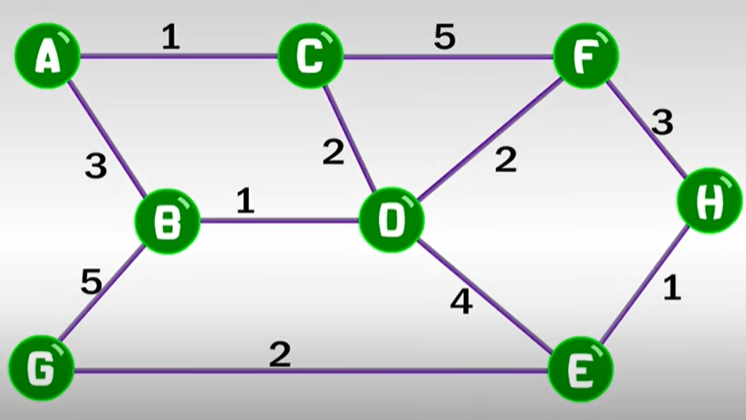
* Muestre nuevamente la imagen del grafo pero en esta ocasión con la solución.

## Práctica 2.2
Vea el video:

* [Camino mas corto Solver](https://youtu.be/LYeMWlTfOgA)

Se pide:  
1. Replique en un archivo de Excel el caso del vídeo, en la Hoja 1. En el método de resolución de Solver elija el método Simplex.
2. En la Hoja 2, aplique esa metodología usando Solver a otro grafo de su invención. Dibuje el grafo, con sus nodos, flechas y pesos, y resuélvalo.
3. Suba el archivo de Excel creado a la tarea del Aula Virtual.

## Práctica 2.3
1. Muestre el enlace a alguna página donde se de el algoritmo de Dijkstra programado en **Python**.
2. Pruebe su código con algún grafo de ejemplo.

## Práctica 2.4
* Dibuja un grafo que tenga un mínimo de 6 nodos
* Crea en **Python** su **matriz de adyacencia**
* Crea en Python su **lista de adyacencia**
* ¿Son cero todos los elementos de la diagonal principal?
 - En qué caso serían todos cero y en qué caso no.
* ¿Es una matriz simétrica?
 - En qué caso sería simétrica y en qué caso no.
* Usando Python, suma todos los valores de la matriz
* Comprueba si funcionan bien o no los siguientes códigos:
 - El primero permite convertir una matriz de adyacencia en una lista de adyacencia.
 - El segundo permite convertir una lista de adyacencia en una matriz de adyacencia.
* Dibuja el grafo del ejemplo que se usa en este código.

In [ ]:
def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = len(matrix)
    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i]==1:
                res[start].append(i)
        start +=1
    return res

matrix =[[0,1,1,1,0,1,1,0,0],[1,0,0,1,0,0,1,1,0],[1,0,0,1,0,0,0,0,0],[1,1,1,0,1,0,0,0,0],[0,0,0,1,0,1,0,0,1],[1,0,0,0,1,0,0,0,1],[1,1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,0,0,1,1,0,0,0]]
print(convert_to_adjacency(matrix))

In [ ]:
def convert_to_matrix(graph):
    matrix =[]
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j]=1
    return matrix

lst =[[1,2,3,5,6],[0,3,6,7],[0,3],[0,1,2,4],[3,5,8],[0,4,8],[0,1],[1],[4,5]]
print(convert_to_matrix(lst))

## Práctica 2.5
**Árboles binarios**
* Mira este vídeo: [¿Qué son los ÁRBOLES BINARIOS y por qué son tan geniales?](https://youtu.be/lMTaNbJAqvM)
* ¿Qué son los **árboles binarios de búsqueda**? (en inglés: BST (Binary Search Tree))
* Mira este vídeo: [Recorrido de Árboles Binarios](https://youtu.be/WCiwBrj8EQY)
* Qué significa recorrer el árbol en:
 - preorden
 - inorden
 - postorden
* Al BST del vídeo anterior añadele dos nodos de tu elección, de forma que continúe siendo un BST, dibujalo (poniendo en color azul claro los dos nodos nuevos) y da su recorrido en:
 - preorden
 - inorden (observa que en este caso los nodos deben quedar **ordenados** de menor a mayor)
 - postorden
* ¿Por qué los BST son importantes en ciencias de la computación?
* Pon un link a una página o vídeo que trate este tema en **Python**.
* ¿Has probado el código en Python que comentas? ¿Funciona con el BST que has puesto como ejemplo?

## Práctica 2.6
* ¿Qué es un **camino hamiltoniano**?
* Pon un ejemplo
* Dibújalo
* Resulevelo
* ¿Qué utilidad tiene?
* Muestra los enlaces a un par de vídeos que hablen de ello

## Práctica 2.7
* Mira este vídeo:
 - [Un problema matemático de ciudades y carreteras](https://youtu.be/kwU1uIbylsM)
* Dibuja el grafo y da tu solución

## Práctica 2.8
* El problema de **los puentes de Königsberg**
* Describe el problema
* Muestra una imagen del grafo resultante
* Quién fue *Euler* y qué hizo para resolver el problema

## Práctica 2.9
* ¿Qué son los **caminos eulerianos**?
* ¿Qué son los **ciclos eulerianos**?
* Da los enlaces a dos vídeos que hablen de ello
* Dibuja un par de casos

## Práctica 2.10
* Mira estos vídeos:
 - [¿Puedes dibujarlo sin despegar el lápiz?](https://youtu.be/IZ0-xFrlvag)
 - [USA esta LÓGICA cuando NO PUEDAS con un PROBLEMA](https://youtu.be/5Ncb7eU0LkQ)
* Caso 1: dibuja un grafo en el que si sea posible y resuélvelo
* Caso 2: dibuja un grafo en el que no sea posible y di el motivo